### **Jorge Mario Trejos Barquero.**
### **B77676.**

#### **Tarea de redes neuronales y redes neuronales profundas**

Link del dataset: https://www.kaggle.com/residentmario/ramen-ratings

#### **Problema y enfoque de la solución**

En este dataset lo que tenemos son variables sobre diferentes restaurantes de ramen, algunas de estas características son: tipos de ramen, país, estilo, entre otros. El problema que se plantea es el de encontrar una forma de poder predecir que restaurantes de ramen van a ser mejores que otros dadas ciertas características (que sean iguales a las de los atributos del dataset), o sea que nuestro modelo va a ser de clasificación ya que cada nota que se le da a un ramen es de 0 a 5, si hacemos que cada una de estas notas sean números enteros podríamos verlo como que existen las clasificaciones 0, 1, 2, 3, 4 y 5, siendo 5 la mejor clasificación donde solo están los mejores ramen y 0 siendo la peor de todas donde solo están los peores ramen. Se podría ver esta clasificación como: muy malo (0), malo (1), un poco malo (2), un poco bueno (3), bueno (4) y muy bueno (5).
Para realizar este trabajo se utilizará una red neuronal.

#### **Iniciamos con el código**

Inicialmente se tendrá un apartado para poder incluir todas las librerías necesarias para poder llevar a cabo esta tarea.

In [129]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import numpy
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score

#### **Análisis exploratorio**

Ahora leemos el dataset y hacemos 2 técnicas de exploración de datos.

1. La primera va a ser ver en donde hay datos faltantes en el dataset. 

2. La segunda va a ser ver la distribución que tiene la variable "Stars" mediante un gráfico. Para esto tenemos que adelantarnos un poco hasta la parte de conversión de datos ya que "Stars" no es un atributo numérico, además de limpiar un poco este atributo ya que como se verá en el la punto 1 hay valores que tenemos que eliminar.

In [112]:
data = pd.read_csv('ramen-ratings.csv', index_col=False)

data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


En los valores faltantes podemos ver que en "Top Ten" hay muchos valores faltantes, esto sucede ya que a como dice su nombre solo se contabilizan los mejores 10. Para el atributo de "Review" se sabe que no hay ningún valor nulo ya que solo es un numero identificador. Todo esto se sabe del lugar de donde se extrajo el dataset.

Para los demás atributos hacemos lo siguiente.

In [113]:
data.loc[data['Brand'].isnull()]
data.loc[data['Variety'].isnull()]
data.loc[data['Style'].isnull()]
data.loc[data['Country'].isnull()]

# Esto se sabe del lugar de donde se extrajo el dataset
data.loc[data['Stars'] == 'Unrated']

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated,NaN
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated,NaN
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated,NaN


Como podemos observar el único problema que tenemos son datos no calificados.

Ahora para efectos de ver la distribución que tiene la variable "Stars" como ya se menciono antes, primero hay que eliminar los valores "Unrated" y convertir a numérico el atributo de "Stars" para poder graficar, ya que si vemos los tipos de datos que tenemos "Stars" es de tipo "Object" lo que nos puede causar problemas a la hora de graficar.

Antes:


Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object


Despues:


Review #      int64
Brand        object
Variety      object
Style        object
Country      object
Stars       float64
Top Ten      object
dtype: object

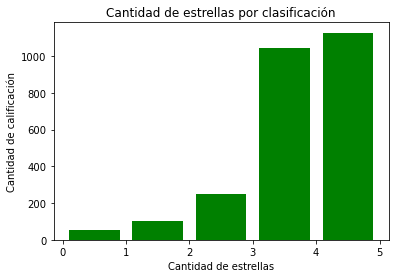

In [114]:
# Para ver el tipo de dato antes de la conversión
print("Antes:")
display(data.dtypes)

# Quitamos los "Unrated"
data = data.drop(data[data['Stars']=='Unrated'].index)

# Convertimos el tipo de dato
print("\nDespues:")
data["Stars"] = data["Stars"].astype(float)

# Para ver el tipo de dato despues de la conversión
display(data.dtypes)

range = (0.0, 5.0)
bins = 5
  
plt.hist(data["Stars"], bins, range, color = 'green',
        histtype = 'bar', rwidth = 0.8)
  
# Nombre eje x
plt.xlabel('Cantidad de estrellas')

# Nombe eje y
plt.ylabel('Cantidad de calificación')

# Titulo
plt.title('Cantidad de estrellas por clasificación')
  
# Mostramos el gráfico
plt.show()

De esto podemos destacar que en general las críticas hacía el ramen son positivas ya que la mayoría suelen recibir más de 3 estrellas.

#### **Preprocesamiento y limpieza de datos**
Para este apartado el dataset está lo suficientemente limpio ya, entonces solo se puede realizar una técnica de preprocesamiento que es codificar los valores de "Brand", "Variety", "Style" y "Country". Esto para luego poder realizar redes neuronales al dataset.

In [115]:
# Convertimos a string los datos para poder codificarlos
data['Brand'] = data['Brand'].astype('str')
data['Variety'] = data['Variety'].astype('str')
data['Style'] = data['Style'].astype('str')
data['Country'] = data['Country'].astype('str')

# Ahora procedemos a codificar los valores
# Primero creamos los enconder
le_brand = LabelEncoder()
le_variety = LabelEncoder()
le_style = LabelEncoder()
le_country = LabelEncoder()

# Ahora creamos las columnas ya codificadas de cada valor
data['Brand_n'] = le_brand.fit_transform(data['Brand'])
data['Variety_n'] = le_brand.fit_transform(data['Variety'])
data['Style_n'] = le_brand.fit_transform(data['Style'])
data['Country_n'] = le_brand.fit_transform(data['Country'])

data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Brand_n,Variety_n,Style_n,Country_n
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN,190,2186,4,18
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN,119,1443,5,32
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN,192,454,4,35
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN,336,709,5,32
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN,38,1951,5,16


In [116]:
# Para tener almacenada la codificación en alguna variable y poder consultarla luego hacemos lo siguiente
codificacion = data.drop(['Review #', 'Top Ten', 'Stars'], axis = 1)
codificacion.head()

,Brand,Variety,Style,Country,Brand_n,Variety_n,Style_n,Country_n
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,190,2186,4,18
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,119,1443,5,32
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,192,454,4,35
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,336,709,5,32
4,Ching's Secret,Singapore Curry,Pack,India,38,1951,5,16


In [117]:
 # Ahora para tener el dataset listo y limpio lo que hacemos es quitar las columnas que tienen strings
data = data.drop(['Brand', 'Variety', 'Style', 'Country'], axis = 1)
data.head()

,Review #,Stars,Top Ten,Brand_n,Variety_n,Style_n,Country_n
0,2580,3.75,NaN,190,2186,4,18
1,2579,1.00,NaN,119,1443,5,32
2,2578,2.25,NaN,192,454,4,35
3,2577,2.75,NaN,336,709,5,32
4,2576,3.75,NaN,38,1951,5,16


#### **Técnicas de transformación de datos, selección y extracción de atributos**

Para esta parte ya se hacen cambios pensando en como se va a utilizar un algoritmo especifico para estudiar el dataset, como lo que se le va a aplicar a este dataset es una red neuronal necesitamos que los datos sean numéricos, para esto se harán dos técnicas:

1. Extracción de la columna "Top Ten" y "Review #" ya que estas columnas para el análisis propuesto no aportan nada que tenga importancia.

2. Convertir la columna "Stars" (nuestra "y" o variable de respuesta) en valores enteros, esto para que, a como se habló al inicio, se pueda tomar la cantidad de estrellas como las clasificaciones a las cuales queremos asignar cada uno de los ramen.

Empezamos con la extracción de las columnas:

In [118]:
data = data.drop(['Review #', 'Top Ten'], axis = 1)
data.head()

,Stars,Brand_n,Variety_n,Style_n,Country_n
0,3.75,190,2186,4,18
1,1.00,119,1443,5,32
2,2.25,192,454,4,35
3,2.75,336,709,5,32
4,3.75,38,1951,5,16


Ahora convertimos "Stars" a entero:

In [119]:
# Convertimos Stars a int64
data['Stars'] = data['Stars'].astype(int)
display(data.dtypes)
data.head()

Stars        int64
Brand_n      int64
Variety_n    int64
Style_n      int64
Country_n    int64
dtype: object

,Stars,Brand_n,Variety_n,Style_n,Country_n
0,3,190,2186,4,18
1,1,119,1443,5,32
2,2,192,454,4,35
3,2,336,709,5,32
4,3,38,1951,5,16


#### **Algoritmos y evaluación del modelo**
Ahora creamos la red neuronal. Tanto para la capa de entrada como las ocultas usamos la función de activación relu ya que es la que se usa tanto para perceptrones multicapa como para redes convolucionales, respecto a la función de activación para la salida se va a usar softmax ya que es la recomendada para problemas de clasificación. 
Primero dividimos el dataset.

In [120]:
data.shape

(2577, 5)

In [121]:
# Siguiendo la regla del 80 20
train_input = data.iloc[:2061,1:]
train_output = data.iloc[:2061,:1]

test_input = data.iloc[2061:,1:]
test_output = data.iloc[2061:,:1]

print (train_input)
print (train_output)
print (test_input)
print (test_output)

      Brand_n  Variety_n  Style_n  Country_n
0         190       2186        4         18
1         119       1443        5         32
2         192        454        4         35
3         336        709        5         32
4          38       1951        5         16
...       ...        ...      ...        ...
2059      165       2027        1         18
2060      187       2338        1         32
2061      268        158        4         29
2062       55         71        1          5
2063      298       2222        5         35

[2061 rows x 4 columns]
      Stars
0         3
1         1
2         2
3         2
4         3
...     ...
2059      4
2060      0
2061      2
2062      4
2063      4

[2061 rows x 1 columns]
      Brand_n  Variety_n  Style_n  Country_n
2064      333        273        1         30
2065      311        863        4         35
2066      262       1816        1         18
2067       55         79        1          5
2068      208        167        1        

Ahora hacemos grid search para encontrar los mejores parametros:

In [123]:
# Function to create model, required for KerasClassifier
def create_model():
    # define the keras model
    model = Sequential()
    model.add(Dense(20, input_dim=4, activation='relu'))
    model.add(Dense(10, activation='relu'))
    # 6 porque son la clasificaciones que hay 0, 1, 2, 3, 4 y 5
    model.add(Dense(6, activation='softmax'))
    #Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
                  
# split into input (X) and output (Y) variables
X = train_input.to_numpy()
Y = train_output.to_numpy()

# create model
model = KerasClassifier(build_fn=create_model(), verbose=0)

# define the grid search parameters
batch_size = [25, 30, 35, 40, 45]
epochs = [100, 150, 200, 250]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.392528 using {'batch_size': 40, 'epochs': 150}
0.346434 (0.077087) with: {'batch_size': 25, 'epochs': 100}
0.335759 (0.013091) with: {'batch_size': 25, 'epochs': 150}
0.358079 (0.070081) with: {'batch_size': 25, 'epochs': 200}
0.385735 (0.080791) with: {'batch_size': 25, 'epochs': 250}
0.263464 (0.023138) with: {'batch_size': 30, 'epochs': 100}
0.296458 (0.024482) with: {'batch_size': 30, 'epochs': 150}
0.342067 (0.063415) with: {'batch_size': 30, 'epochs': 200}
0.382824 (0.078260) with: {'batch_size': 30, 'epochs': 250}
0.359049 (0.060710) with: {'batch_size': 35, 'epochs': 100}
0.380883 (0.069771) with: {'batch_size': 35, 'epochs': 150}
0.381853 (0.051919) with: {'batch_size': 35, 'epochs': 200}
0.288210 (0.108153) with: {'batch_size': 35, 'epochs': 250}
0.335274 (0.064050) with: {'batch_size': 40, 'epochs': 100}
0.392528 (0.068339) with: {'batch_size': 40, 'epochs': 150}
0.373605 (0.070836) with: {'batch_size': 40, 'epochs': 200}
0.346434 (0.053733) with: {'batch_size': 40, 

Como podemos observar los mejores resultados fueron con "batch size" de 40 y "epochs" de 150.

Ahora vamos a probar este mejor resultado contra el dataset de test:

In [132]:
model = create_model()
          
# fit the keras model on the dataset
model.fit(train_input, train_output, epochs=150, batch_size=40, verbose=0)
          
# evaluate on test set
yhat = model.predict(test_input)
yhat = numpy.argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(test_output, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.459


Como podemos observar tiene una precisiṕn de 0.459 o el 46% lo cual no es muy alto como para poder confiar ciegamente en las predicciones que realice este modelo.